# Plane Wave and $\sin(x)^2$ probability distribution

Algorithm described, for example, in Lubasch2020PRA Supplemental Material

Notebook by: Óscar Amaro

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# initialization
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import *
from qiskit import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

import operator 

# Plane Wave
As the phase is not of each state is not directly measurable, all states will be equally probable.

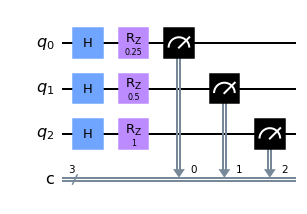

In [6]:
n = 3
qc = QuantumCircuit(n,n)
k = 2

for nn in range(n):
    qc.h(nn)
    qc.rz(k/2**(n-nn), nn)

for nn in range(n):
    qc.measure(nn,nn)
    
qc.draw('mpl')

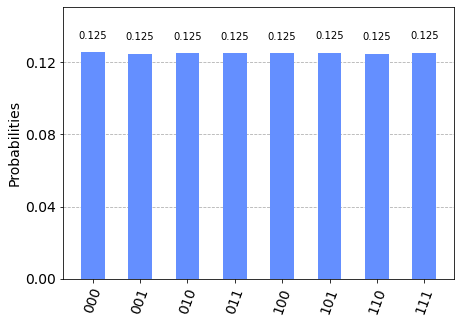

In [7]:
# Let's see the results!
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1e6
t_qpe2 = transpile(qc, qasm_sim)
qobj = assemble(t_qpe2, shots=shots)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

# $\sin^2$
To get a $\sin^2$ or $\cos ^2$ distribution instead of a flat one, we need to conditionally "uncompute" double the phase in each qubit, depending on the measurement of an auxiliary qubit.

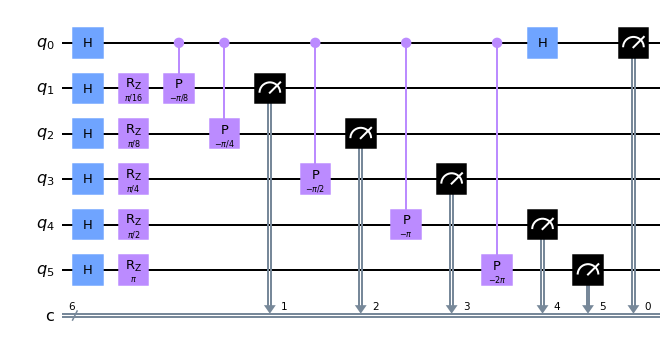

In [9]:
n = 5
qc = QuantumCircuit(n+1,n+1)
k = 2*np.pi

qc.h(0)
for nn in range(1,n+1):
    qc.h(nn)
    # apply a phase in a geometrical progression
    qc.rz(k/2**(n+1-nn), nn)
for nn in range(1,n+1):
    # uncompute double the phase
    qc.cp(-k/2**(n+1-nn)*2, 0, nn)
qc.h(0)
for nn in range(n+1):
    qc.measure(nn,nn)
    
qc.draw('mpl')

In [10]:
# Let's see the results!
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1e4
t_qpe2 = transpile(qc, qasm_sim)
qobj = assemble(t_qpe2, shots=shots)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
#plot_histogram(answer)

In [11]:
answer_sorted = dict(sorted(answer.items(), key=operator.itemgetter(0)))
#plot_histogram(sorted_dict)

# filter results according to measured auxiliary qubit
lst_sin = {}
lst_cos = {}
for item,itemc in answer_sorted.items():
    if item[-1] == '0':
        lst_cos[item] = itemc
    if item[-1] == '1':
        lst_sin[item] = itemc
        #print(itemc)

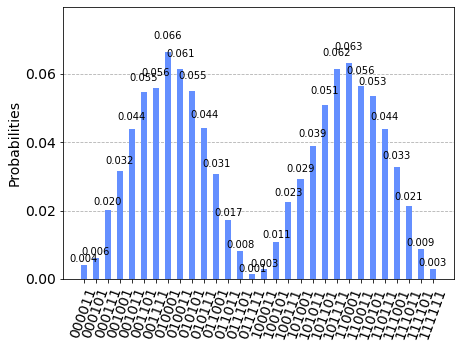

In [12]:
plot_histogram(lst_sin)

We can define a function to automate the procedure

In [13]:
def getplt(n,k,shots=1e4):
    """
        n - number of qubits
        k - wave number
        shots - number of simulated shots
    """
    # define circuit
    qc = QuantumCircuit(n+1,n+1)
    qc.h(0)
    for nn in range(1,n+1):
        qc.h(nn)
        qc.rz(k/2**(n+1-nn), nn)
    for nn in range(1,n+1):
        qc.cp(-k/2**(n+1-nn)*2, 0, nn)
    qc.h(0)
    for nn in range(n+1):
        qc.measure(nn,nn)
    # qasm
    qasm_sim = Aer.get_backend('qasm_simulator')
    t_qpe2 = transpile(qc, qasm_sim)
    qobj = assemble(t_qpe2, shots=shots)
    results = qasm_sim.run(qobj).result()
    answer = results.get_counts()
    answer_sorted = dict(sorted(answer.items(), key=operator.itemgetter(0)))
    # filter results
    lst_sin = {}
    lst_cos = {}
    for item,itemc in answer_sorted.items():
        if item[-1] == '0':
            lst_cos[item] = itemc
        if item[-1] == '1':
            lst_sin[item] = itemc
        
    # get plot
    pltsin = plot_histogram(lst_sin)
    pltcos = plot_histogram(lst_cos)
    return pltsin, pltcos

In [20]:
pltsin, pltcos = getplt(5,np.pi*2,1e5)

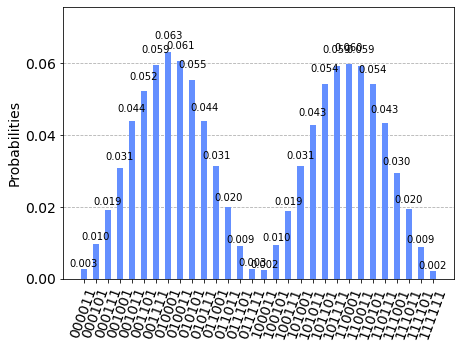

In [21]:
pltsin

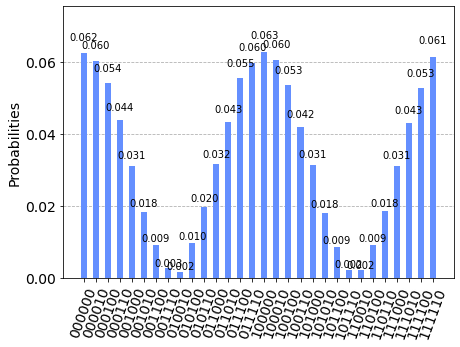

In [22]:
pltcos

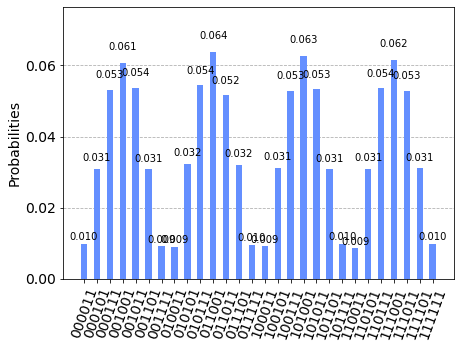

In [24]:
# we can also change the wavenumber to have more "peaks"
pltsin, pltcos = getplt(5,4*np.pi,1e5)
pltsin